In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6
import itertools

In [24]:
# データの読み込み
data = pd.read_csv('./newly_confirmed_cases_daily.csv', index_col='Date', parse_dates=True)
data.index = pd.DatetimeIndex(data.index.values, freq=data.index.inferred_freq)
data

,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
2020-01-16,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-19,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-15,108185,1913,538,568,1607,409,535,1237,3239,1619,...,1391,597,6117,1067,1500,1951,1280,1467,2051,814
2023-01-16,54416,1013,329,351,889,163,214,708,2614,659,...,601,317,2007,435,463,849,973,710,1176,433
2023-01-17,126989,3129,951,1123,1745,726,720,1936,931,2136,...,2407,980,6339,1348,1907,3014,1396,2078,2380,965
2023-01-18,125108,2645,706,833,1799,507,721,1761,3437,1798,...,1374,657,6473,1065,1476,2018,1519,1447,1948,706


In [25]:
#愛知のデータのみ抽出
data_aichi = data['Aichi']
data_aichi

2020-01-16        0
2020-01-17        0
2020-01-18        0
2020-01-19        0
2020-01-20        0
              ...  
2023-01-15     6866
2023-01-16     2234
2023-01-17    10668
2023-01-18     8573
2023-01-19     6378
Freq: D, Name: Aichi, Length: 1100, dtype: int64

## データの可視化・分解

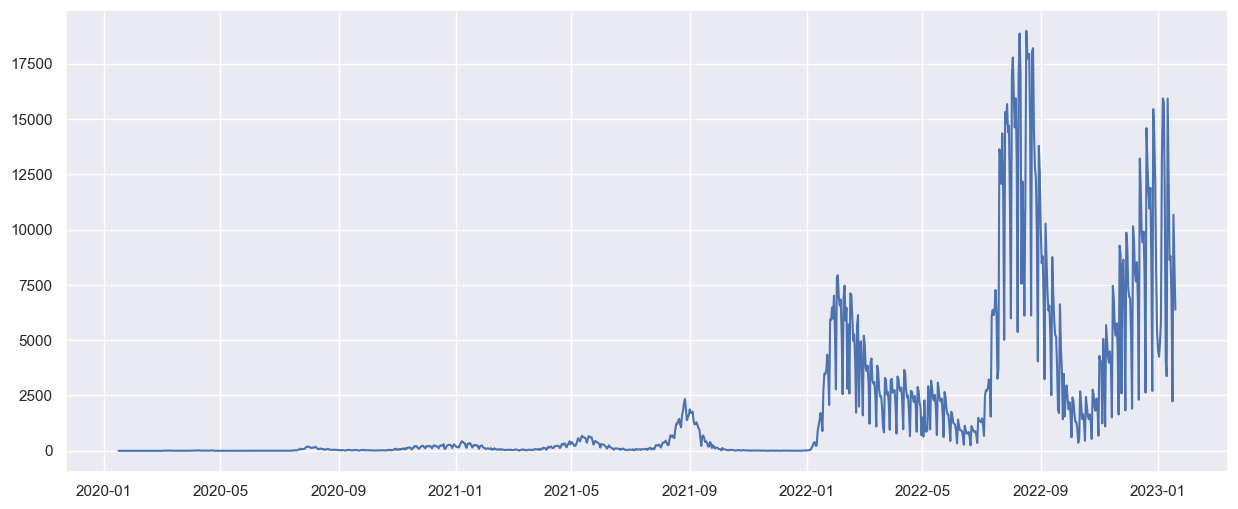

In [26]:
plt.plot(data_aichi)
plt.show()

## 自己相関係数・変自己相関係数

c:\Users\ayumi\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


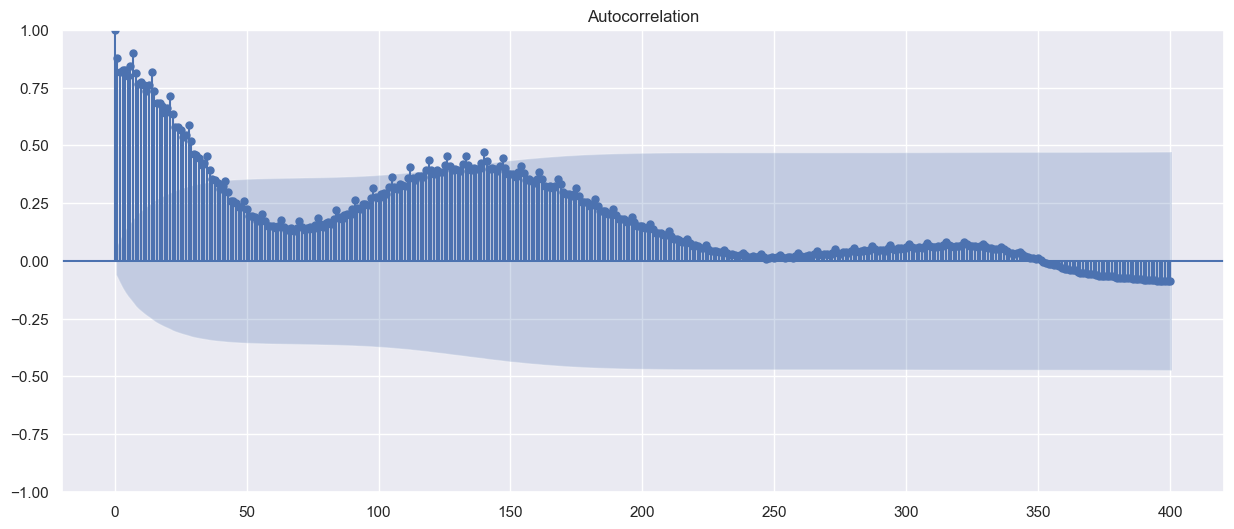

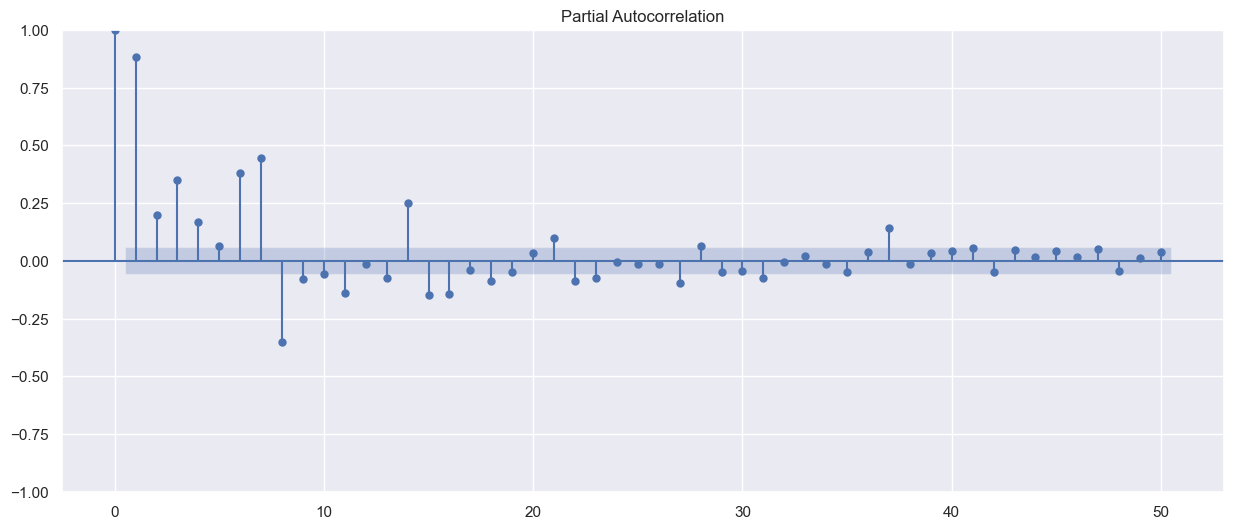

In [27]:
fig_1 = sm.graphics.tsa.plot_acf(data_aichi, lags=400)
fig_2 = sm.graphics.tsa.plot_pacf(data_aichi, lags=50)

## 波状分解

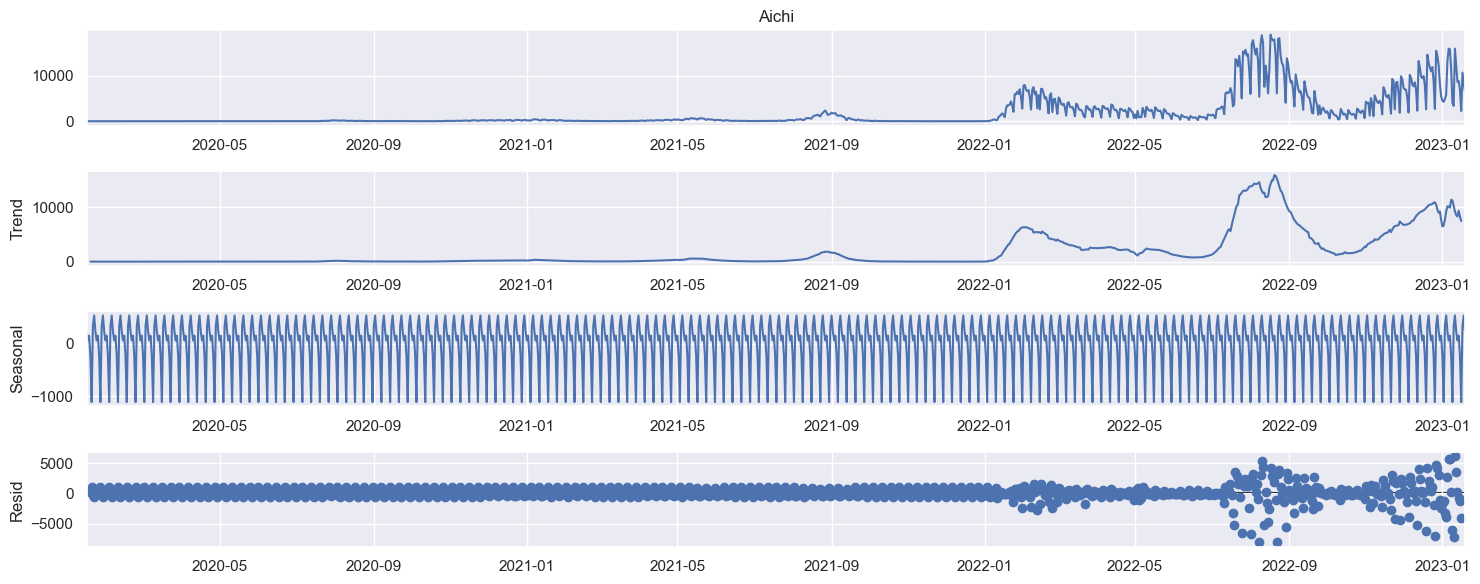

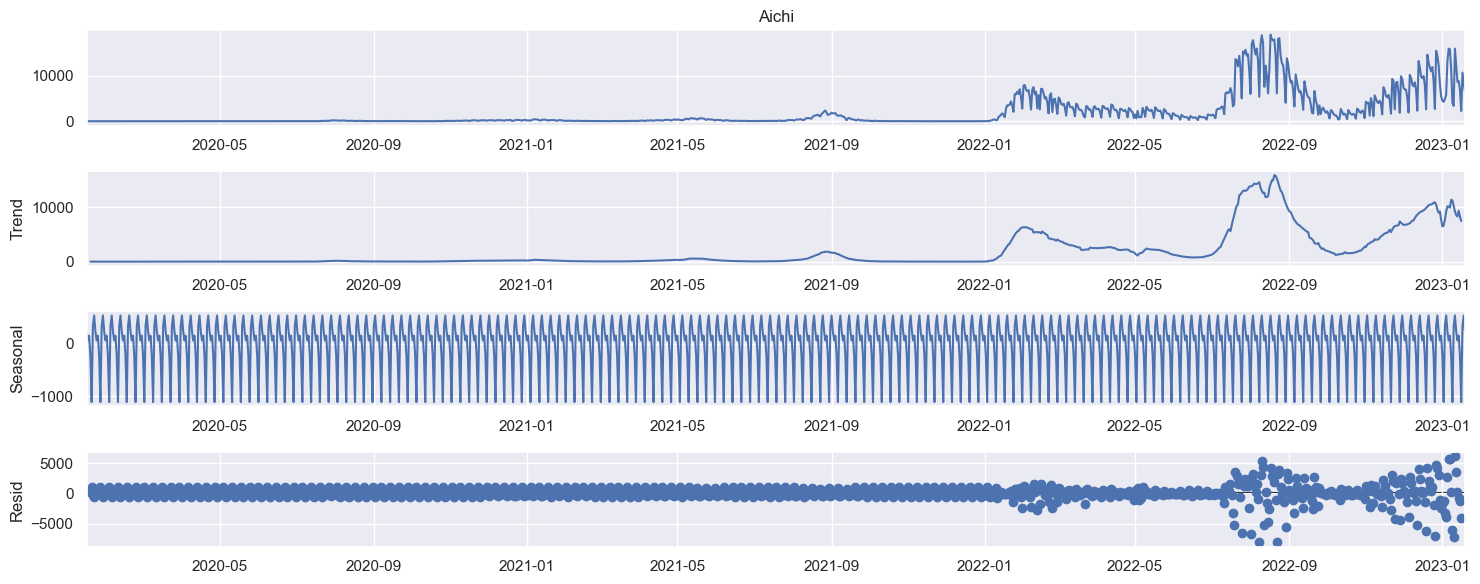

In [28]:
result = seasonal_decompose(data_aichi)
result.plot()

Seasonalから、なにかしら周期性が強く表れていることが読み取れる。\
Resid(誤差)からは、説明できない誤差が後半にかけて現れている。いわゆる第〇波といった影響だろう。

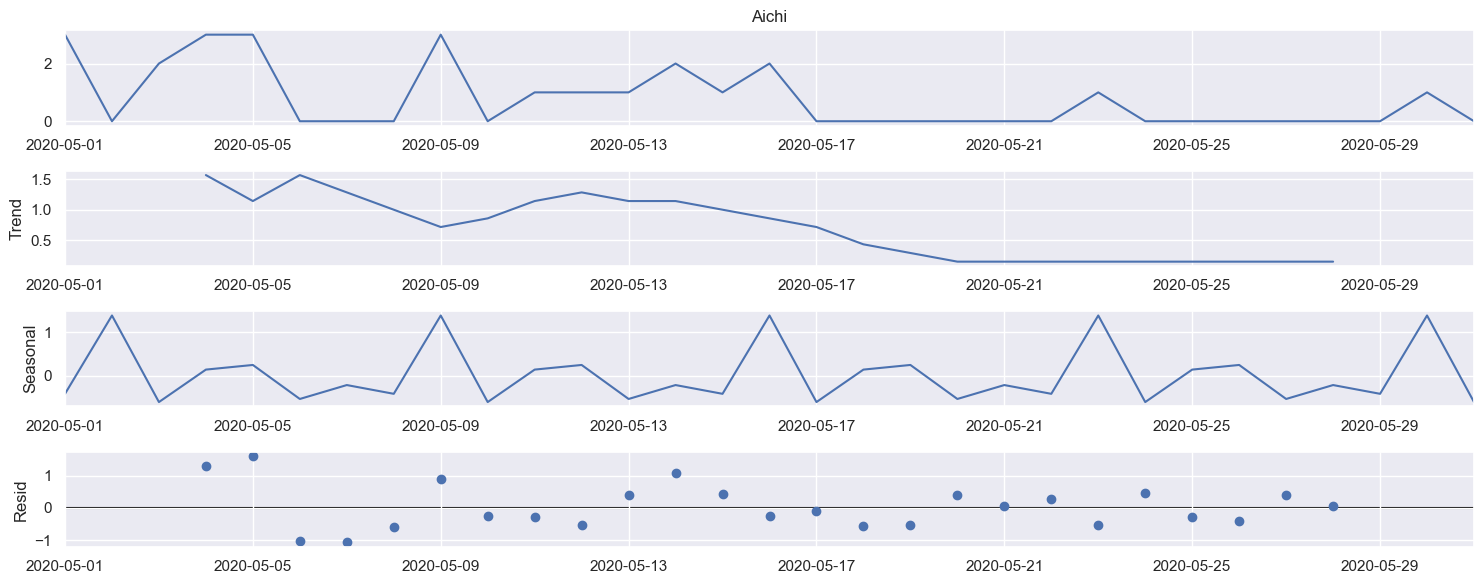

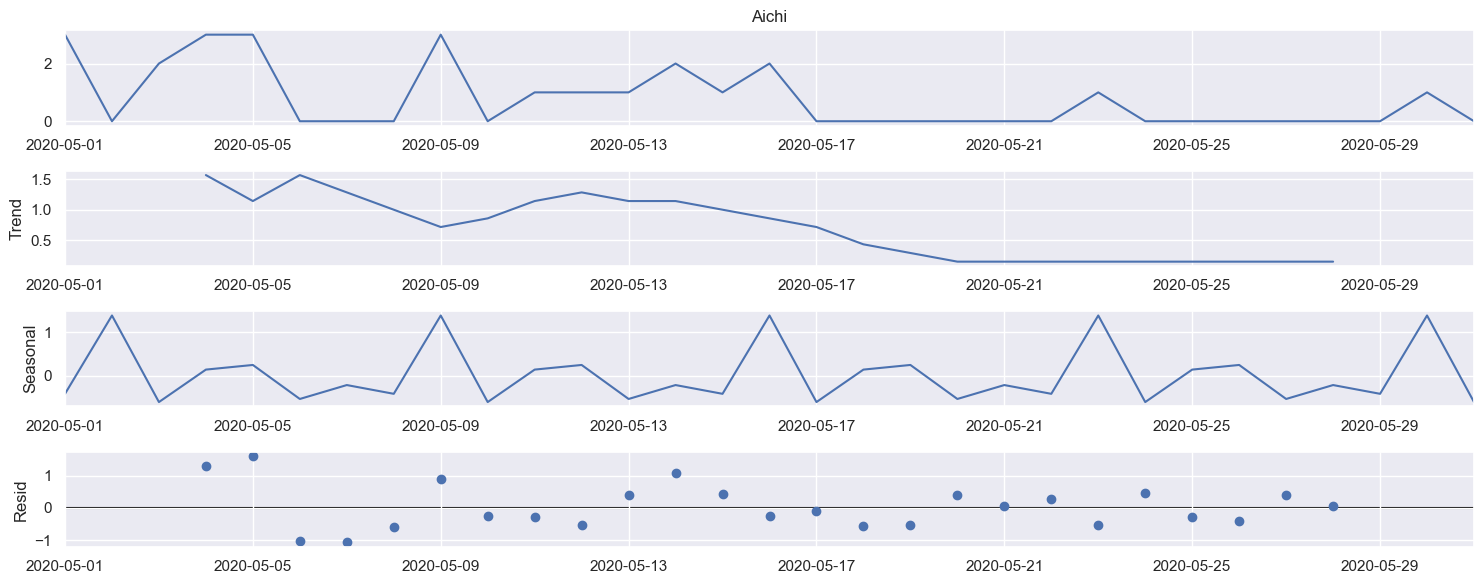

In [29]:
# Seasonalについて、もう少し狭い範囲でプロットして意味を探ってみる
result = seasonal_decompose(data_aichi['2020-05-1':'2020-05-31'])
result.plot()

おそらく、曜日による影響だろう。つまり7日周期で感染者数が推移している。

## 単位根検定
単位根があるかどうか検定し、モデルの選定をする

In [30]:
print('-----------原系列-----------')
nc = sm.tsa.stattools.adfuller(data_aichi, regression='n')
c = sm.tsa.stattools.adfuller(data_aichi, regression='c')
ct = sm.tsa.stattools.adfuller(data_aichi, regression='ct')
ctt = sm.tsa.stattools.adfuller(data_aichi, regression='ctt')

print('nc p-value:' + str(nc[1]))
print('c p-value:' + str(c[1]))
print('ct p-value:' + str(ct[1]))
print('ctt p-value:' + str(ctt[1]))

print()
print('--------一次階差系列---------')
data_diff = data_aichi.diff().dropna()

nc = sm.tsa.stattools.adfuller(data_diff, regression='n')
c = sm.tsa.stattools.adfuller(data_diff, regression='c')
ct = sm.tsa.stattools.adfuller(data_diff, regression='ct')
ctt = sm.tsa.stattools.adfuller(data_diff, regression='ctt')

print('nc p-value:' + str(nc[1]))
print('c p-value:' + str(c[1]))
print('ct p-value:' + str(ct[1]))
print('ctt p-value:' + str(ctt[1]))

-----------原系列-----------
nc p-value:0.003872087795768929
c p-value:0.008091196533622157
ct p-value:0.00010493691982162025
ctt p-value:1.6291175513369287e-05

--------一次階差系列---------
nc p-value:1.505903643220676e-07
c p-value:2.898127744662924e-06
ct p-value:3.081758923493408e-05
ctt p-value:0.00017411050116722496


この結果を見ると、元の系列データも単位根を持っていないといえる。\
しかしながら一次階差系列のほうが有意に帰無仮説を棄却できているため、ARIMAモデルを使うことにする。

## 次元探索

In [54]:
#まずはARMAモデルにて最適な次数を探索
params2 = sm.tsa.arma_order_select_ic(data_diff, ic='aic', trend='n')
params2

c:\Users\ayumi\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\ayumi\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\ayumi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'aic':               0             1             2
 0  19491.383102  19213.231802  19144.230475
 1  19422.163478  19172.570233  19135.696580
 2  19250.029150  19124.523478  19076.955505
 3  19216.961013  19126.523199  19120.640755
 4  19212.066720  19112.180996  18912.931962,
 'aic_min_order': (4, 2)}

In [55]:
p = range(0,3)
d = range(0,3)
q = range(0,3)
pdg = list(itertools.product(p,d,q))

seasonal_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p,d,q))]

best_param_seasonal = [0,0,0,0]
best_aic = 999999

best_param = (4,1,2)

for param_seasonal in seasonal_pdq:
    try:
        mod = sm.tsa.statespace.SARIMAX(data_aichi, order=best_param, seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=False)
        results = mod.fit()
        print('ARIMA{}x{}7 - AIC:{}'.format(best_param, param_seasonal, results.aic))

        if best_aic > results.aic:
            best_param_seasonal = param_seasonal
            best_aic = results.aic
    
    except:
        continue

print('*BEST ARIMA{}x{}7 - AIC:{}'.format(best_param, best_param_seasonal, best_aic))

ARIMA(4, 1, 2)x(0, 0, 0, 7)7 - AIC:19055.131647920098
ARIMA(4, 1, 2)x(0, 0, 1, 7)7 - AIC:18687.594361369156


c:\Users\ayumi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 1, 2)x(0, 0, 2, 7)7 - AIC:18422.354327739144
ARIMA(4, 1, 2)x(0, 1, 0, 7)7 - AIC:18687.97151597429


c:\Users\ayumi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 1, 2)x(0, 1, 1, 7)7 - AIC:18295.987822148687


c:\Users\ayumi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 1, 2)x(0, 1, 2, 7)7 - AIC:18241.58258849712
ARIMA(4, 1, 2)x(0, 2, 0, 7)7 - AIC:19555.56801544715
ARIMA(4, 1, 2)x(0, 2, 1, 7)7 - AIC:34499.385036548


c:\Users\ayumi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 1, 2)x(0, 2, 2, 7)7 - AIC:31768.308814501346
ARIMA(4, 1, 2)x(1, 0, 0, 7)7 - AIC:18437.790646113346


c:\Users\ayumi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 1, 2)x(1, 0, 1, 7)7 - AIC:18396.815694057594


c:\Users\ayumi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 1, 2)x(1, 0, 2, 7)7 - AIC:18254.79945870817


c:\Users\ayumi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 1, 2)x(1, 1, 0, 7)7 - AIC:18370.104628946214


c:\Users\ayumi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 1, 2)x(1, 1, 1, 7)7 - AIC:18563.20022357843


c:\Users\ayumi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 1, 2)x(1, 1, 2, 7)7 - AIC:18478.71308895658


c:\Users\ayumi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 1, 2)x(1, 2, 0, 7)7 - AIC:31059.364384614295


c:\Users\ayumi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 1, 2)x(1, 2, 1, 7)7 - AIC:30437.41217735533


c:\Users\ayumi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 1, 2)x(1, 2, 2, 7)7 - AIC:32877.28808734183


c:\Users\ayumi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 1, 2)x(2, 0, 0, 7)7 - AIC:18239.437895019015


c:\Users\ayumi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 1, 2)x(2, 0, 1, 7)7 - AIC:18239.957842961583


c:\Users\ayumi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 1, 2)x(2, 0, 2, 7)7 - AIC:18241.833474126834


c:\Users\ayumi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 1, 2)x(2, 1, 0, 7)7 - AIC:18175.09121113806


c:\Users\ayumi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 1, 2)x(2, 1, 1, 7)7 - AIC:18273.752218797992


c:\Users\ayumi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 1, 2)x(2, 1, 2, 7)7 - AIC:22538.955011806574


c:\Users\ayumi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 1, 2)x(2, 2, 0, 7)7 - AIC:30528.7798885346
ARIMA(4, 1, 2)x(2, 2, 1, 7)7 - AIC:33140.213779522484


c:\Users\ayumi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 1, 2)x(2, 2, 2, 7)7 - AIC:34066.416490989155
*BEST ARIMA(4, 1, 2)x(2, 1, 0, 7)7 - AIC:18175.09121113806


## モデル作成・予測

In [46]:
#データ分割
train_data = data_aichi[:'2022-12-31']

In [65]:
sarima_model = sm.tsa.SARIMAX(train_data, order=(4,1,2), seasonal_order=(2,1,0,7), enforce_invertibility=False, enforce_stationarity=False)
result = sarima_model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Aichi   No. Observations:                 1081
Model:             SARIMAX(4, 1, 2)x(2, 1, [], 7)   Log Likelihood               -8654.351
Date:                            Thu, 19 Jan 2023   AIC                          17326.701
Time:                                    23:16:33   BIC                          17371.353
Sample:                                01-16-2020   HQIC                         17343.628
                                     - 12-31-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1724      0.051     -3.394      0.001      -0.272      -0.073
ar.L2          0.4404      0.031     14.081      0.000       0.379       0.502
ar.L3          0.2329      0.020     11.771      0.000       0.194       0.272
ar.L4          0.2910      0.016     17.932      0.000       0.259       0.323
ma.L1         -0.3879      0.056     -6.881      0.000      -0.498      -0.277
ma.L2         -0.6113      0.055    -11.114      0.000      -0.719      -0.504
ar.S.L7       -0.4058      0.015    -26.888      0.000      -0.435      -0.376
ar.S.L14      -0.1073      0.022     -4.806      0.000      -0.151      -0.064
sigma2      9.032e+05   1.83e+04     49.349      0.000    8.67e+05    9.39e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):             30095.67
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):            2932.30   Skew:                            -0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                        29.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [66]:
best_pred = result.predict(start='2022-01-01', end='2023-12-31')

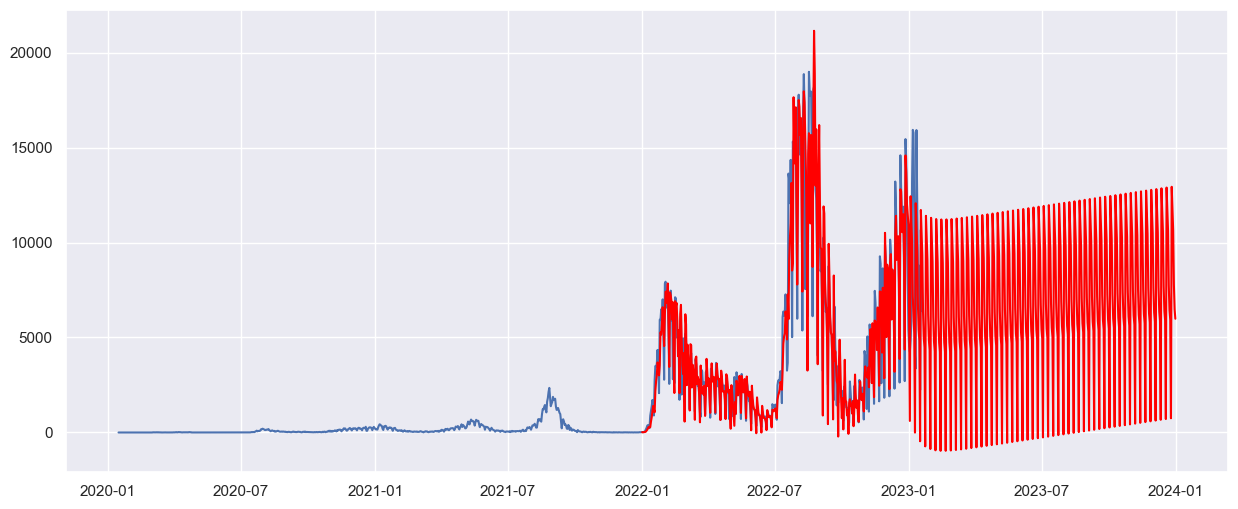

In [67]:
plt.plot(data_aichi, c='b')
plt.plot(best_pred, c='red')
plt.show()